# Lecture 6: Matrix

Date: 09/19/2017, Tuessday

In [1]:
format compact

## Matrix operation basics

Making a [magic square](https://en.wikipedia.org/wiki/Magic_square)

In [2]:
A = magic(3)

A =
     8     1     6
     3     5     7
     4     9     2


Take transpose

In [3]:
A'

ans =
     8     3     4
     1     5     9
     6     7     2


Rotate by 90 degree. (Not so useful for linear algebra. Could be useful for image processing.)

In [4]:
rot90(A')

ans =
     4     9     2
     3     5     7
     8     1     6


Sum over each column

In [5]:
sum(A)

ans =
    15    15    15


Another equivalent way

In [6]:
sum(A, 1)

ans =
    15    15    15


Sum over each row

In [7]:
sum(A, 2)

ans =
    15
    15
    15


Extract the diagonal elements.

In [8]:
diag(A)

ans =
     8
     5
     2


The sum of diagonal elements is also 15, by the definition of a magic square.

In [9]:
sum(diag(A))

ans =
    15


Determinant

In [10]:
det(A)

ans =
  -360


Matrix inversion $A^{-1}$

In [11]:
inv(A)

ans =
    0.1472   -0.1444    0.0639
   -0.0611    0.0222    0.1056
   -0.0194    0.1889   -0.1028


## Built-in image for magic square

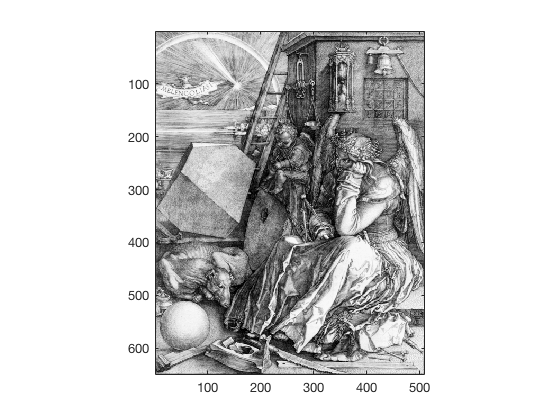

In [12]:
load durer
image(X)
colormap(map)
axis image

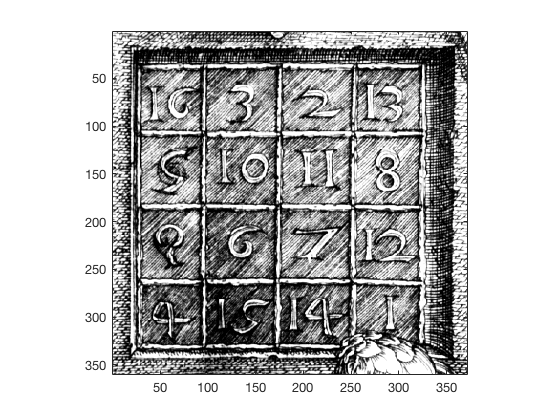

In [13]:
load detail
image(X)
colormap(map)
axis image

## Vector norms

In [14]:
x = 1:5 % make a boring vector

x =
     1     2     3     4     5


Calculate p-norm from formula

In [15]:
my_norm = @(x,p) (sum(abs(x).^p))^(1/p)

my_norm =
  function_handle with value:
    @(x,p)(sum(abs(x).^p))^(1/p)


Check if it works.

In [16]:
my_norm(x,1)

ans =
    15


As p increases, the norm converges to $\max(|x|)$

In [17]:
for p=1:10
    my_norm(x,p)
end

ans =
    15
ans =
    7.4162
ans =
    6.0822
ans =
    5.5937
ans =
    5.3602
ans =
    5.2321
ans =
    5.1557
ans =
    5.1073
ans =
    5.0756
ans =
    5.0541


It blows up at $p=442$ because $5^{442}$ exceeds the `realmin`.

In [18]:
my_norm(x,441), my_norm(x,442)

ans =
     5
ans =
   Inf


In [19]:
5^441

ans =
  1.7611e+308


In [20]:
5^442

ans =
   Inf


Built-in function `norm` works for large numbers, though. Think about why.

In [21]:
norm(x,441), norm(x,442)

ans =
     5
ans =
     5


## Conditioning

4x4 magic square

In [22]:
B = magic(4)

B =
    16     2     3    13
     5    11    10     8
     9     7     6    12
     4    14    15     1


It is singular and ill-conditioned.

In [23]:
inv(B)

ans =
   1.0e+15 *
   -0.2649   -0.7948    0.7948    0.2649
   -0.7948   -2.3843    2.3843    0.7948
    0.7948    2.3843   -2.3843   -0.7948
    0.2649    0.7948   -0.7948   -0.2649


In [24]:
det(B)

ans =
   5.1337e-13


In [25]:
cond(B)

ans =
   4.7133e+17


Use 1-norm instead. All norms should have similar order of magnitude.

In [26]:
cond(B,1)

> In cond (line 46)
ans =
   2.1617e+17


The condition number reaches `1/eps`, leading to large numerical error.

In [27]:
1/eps

ans =
   4.5036e+15


## Sparse matrix

In [28]:
A = eye(10)

A =
     1     0     0     0     0     0     0     0     0     0
     0     1     0     0     0     0     0     0     0     0
     0     0     1     0     0     0     0     0     0     0
     0     0     0     1     0     0     0     0     0     0
     0     0     0     0     1     0     0     0     0     0
     0     0     0     0     0     1     0     0     0     0
     0     0     0     0     0     0     1     0     0     0
     0     0     0     0     0     0     0     1     0     0
     0     0     0     0     0     0     0     0     1     0
     0     0     0     0     0     0     0     0     0     1


Store it in the sparse form saves memory.

In [29]:
As = sparse(A)

As =
   (1,1)        1
   (2,2)        1
   (3,3)        1
   (4,4)        1
   (5,5)        1
   (6,6)        1
   (7,7)        1
   (8,8)        1
   (9,9)        1
  (10,10)       1


Use `whos A` and `whos As` to check memory usage.

Visualize sparsity. Also works for `As`

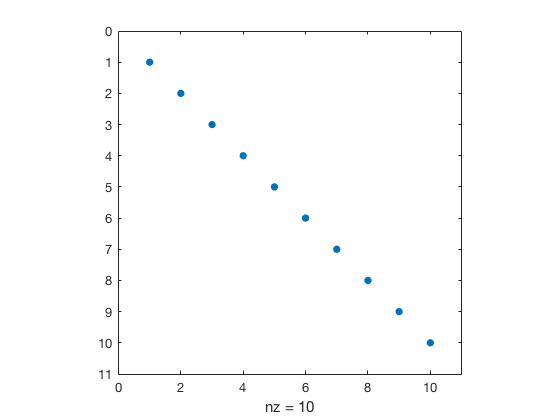

In [30]:
spy(A)